In [1]:
!pip install scikit-plot

In [116]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [59]:
filepath="https://github.com/dsrscientist/DSData/raw/master/Telecom_customer_churn.csv"
data=pd.read_csv(filepath)

In [60]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [63]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [64]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## There is no missing value in the dataset

In [65]:
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

customerID
7638-QVMVY    1
3807-XHCJH    1
6473-ULUHT    1
6198-RTPMF    1
7706-YLMQA    1
             ..
9518-RWHZL    1
4332-MUOEZ    1
4505-EXZHB    1
0277-ORXQS    1
4895-TMWIR    1
Name: customerID, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity
No                     34

## To See the Percentage of customers that are leaving

In [67]:
numRetained = data[data.Churn == 'No'].shape[0]
numChurned = data[data.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned) * 100,'% of customers stayed in the company')
# print the percentage of customers that left
print(numChurned/(numRetained + numChurned) * 100, '% of customers left with the company')

73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


## visualize the 'Churn' data for Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

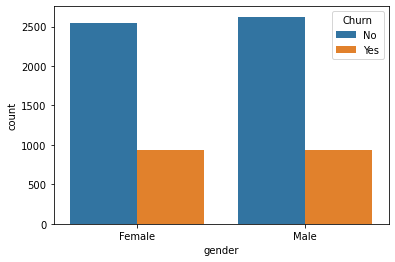

In [68]:
sns.countplot(x ='gender', hue='Churn', data=data)

## Visualize the 'Churn' count for the Internet Service

<AxesSubplot:xlabel='InternetService', ylabel='count'>

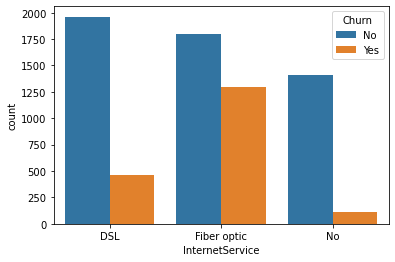

In [69]:
sns.countplot(x='InternetService', hue='Churn', data=data)

## Visualize the numeric data

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

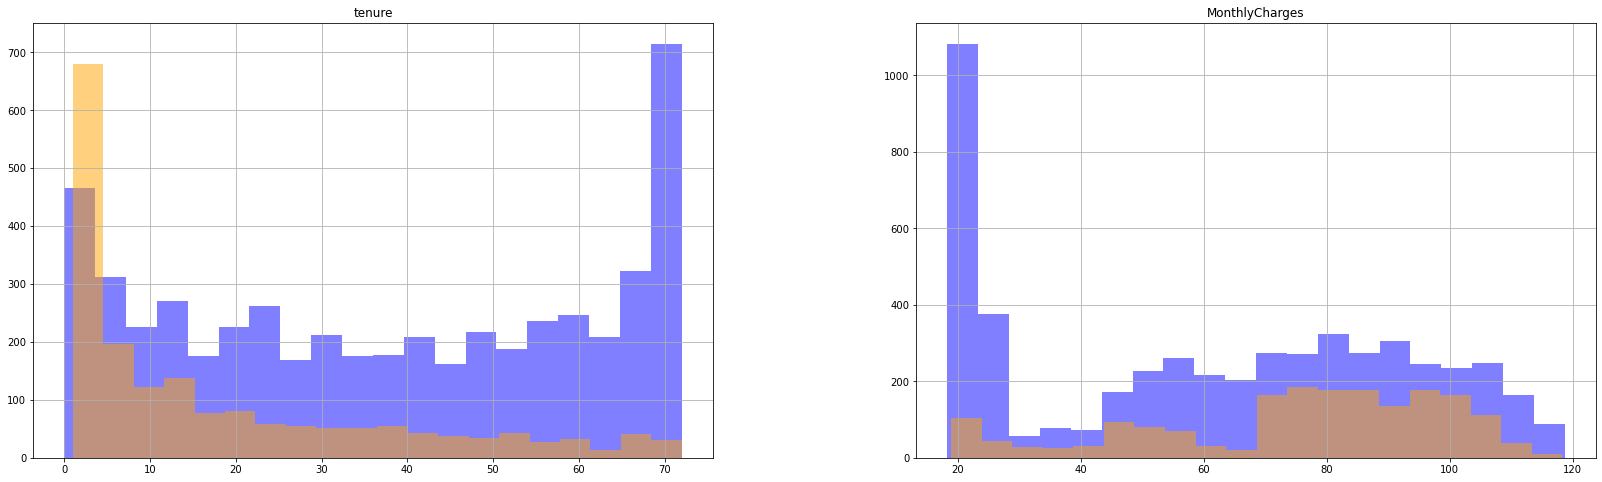

In [70]:
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
data[data.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
data[data.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

## To Drop the Unnecessary column

In [71]:
data = data.drop('customerID', axis=1)

In [72]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Convert all the non-numeric columns to numeric

In [79]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['Partner'] = label_encoder.fit_transform(data['Partner'])
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder.fit_transform(data['InternetService'])
data['OnlineSecurity'] = label_encoder.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = label_encoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = label_encoder.fit_transform(data['DeviceProtection'])
data['TechSupport'] = label_encoder.fit_transform(data['TechSupport'])
data['StreamingTV'] = label_encoder.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = label_encoder.fit_transform(data['StreamingMovies'])
data['Contract'] = label_encoder.fit_transform(data['Contract'])
data['PaperlessBilling'] = label_encoder.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = label_encoder.fit_transform(data['PaymentMethod'])
data['TotalCharges'] = label_encoder.fit_transform(data['TotalCharges'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [81]:
data['MonthlyCharges']=data['MonthlyCharges'].astype(int)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int64
 3   Dependents        7043 non-null   int64
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  MonthlyCharges    7043 non-null  

## Scaled the data

In [84]:
x = data.drop('Churn', axis=1)
y = data['Churn']
x = StandardScaler().fit_transform(x)

In [87]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [89]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [90]:
predictions = logreg.predict(xtest)

In [91]:
print(predictions)

[1 0 0 ... 0 0 1]


In [94]:
print(accuracy_score(ytest, predictions))

0.8168914123491838


In [92]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [95]:
# KNN Classifier

knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [96]:
pred = knn.predict(xtest)

In [97]:
print(accuracy_score(ytest, pred))

0.7757274662881476


In [98]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.58      0.53      0.56       373

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [99]:
# DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [100]:
pred = dt.predict(xtest)

In [101]:
print(accuracy_score(ytest, pred))

0.7182398864442867


In [102]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1036
           1       0.47      0.45      0.46       373

    accuracy                           0.72      1409
   macro avg       0.64      0.63      0.63      1409
weighted avg       0.71      0.72      0.72      1409



In [103]:
# SVC()

svm_clf=SVC()
svm_clf.fit(xtrain,ytrain)

SVC()

In [104]:
pred = svm_clf.predict(xtest)

In [105]:
print(accuracy_score(ytest, pred))

0.8069552874378992


In [106]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.69      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



In [107]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)

SGDClassifier()

In [108]:
pred = sgd.predict(xtest)

In [109]:
print(accuracy_score(ytest, pred))

0.8062455642299503


In [110]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [111]:
# RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [112]:
pred = rf.predict(xtest)

In [113]:
print(accuracy_score(ytest, pred))

0.7963094393186657


In [114]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



## Cross-Validation

In [117]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(logreg,x,y,cv=5)

#now i will take the mean of it

cross_val_score(logreg,x,y,cv=5).mean()

0.8040624596748177

In [118]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(knn,x,y,cv=5)

#now i will take the mean of it

cross_val_score(knn,x,y,cv=5).mean()

0.7509584287695981

In [119]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(dt,x,y,cv=5)

#now i will take the mean of it

cross_val_score(dt,x,y,cv=5).mean()

0.7217099691915607

In [120]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(svm_clf,x,y,cv=5)

#now i will take the mean of it

cross_val_score(svm_clf,x,y,cv=5).mean()

0.7973889444480289

In [121]:

cross_val_score(sgd,x,y,cv=5)

#now i will take the mean of it

cross_val_score(sgd,x,y,cv=5).mean()

0.788726087166914

In [122]:
cross_val_score(rf,x,y,cv=5)

#now i will take the mean of it

cross_val_score(rf,x,y,cv=5).mean()

0.7877335836182979

In [125]:
## Instantiate classifier
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state = 30)

## Set up hyperparameter grid for tuning
lr_param_grid = {'C' : [0.0001, 0.001, 0.01, 0.05, 0.1] }

## Tune hyperparamters
lr_cv = GridSearchCV(lr, param_grid = lr_param_grid, cv = 5)

In [126]:
## Fit lr to training data
lr_cv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=30),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.05, 0.1]})

In [127]:
## Get info about best hyperparameters
print("Tuned LR Parameters: {}".format(lr_cv.best_params_))
print("Best LR Training Score:{}".format(lr_cv.best_score_))

Tuned LR Parameters: {'C': 0.05}
Best LR Training Score:0.7999651694796384


In [128]:
## Predict lr on test data
print("LR Test Performance: {}".format(lr_cv.score(xtest, ytest)))

LR Test Performance: 0.8183108587650816


In [130]:
## Obtain model performance metrics
from sklearn.metrics import roc_curve,roc_auc_score
lr_pred_prob = lr_cv.predict_proba(xtest)[:,1]
lr_auroc = roc_auc_score(ytest, lr_pred_prob)
print("LR AUROC: {}".format(lr_auroc))
lr_y_pred = lr_cv.predict(xtest)

LR AUROC: 0.8602081112134732


## We have Increased the model performance from 80% to 86%

In [132]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': [10, 25, 50, 100, 150, 200],
                       'max_features':['auto','square','log2'],
                       'max_depth':[1, 2, 3, 4, 5],
                       'criterion':['gini', 'entropy']}

tree_cv = RandomizedSearchCV(rf, param_dist, cv = 5)

tree_cv.fit(xtrain, ytrain)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 10, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy'}
Best score is 0.7902009610701954


In [133]:
best_model = tree_cv.best_estimator_
best_model

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=10)

In [134]:
mod=RandomForestClassifier(criterion='entropy',max_depth=5,max_features='log2',n_estimators=10)
mod.fit(xtrain,ytrain)
pred=mod.predict(xtest)
print(accuracy_score(ytest,pred)*100)

79.4889992902768


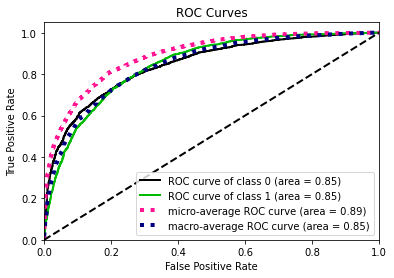

In [137]:
from sklearn.metrics import roc_curve
import scikitplot as skl
probas=logreg.predict_proba(x)
skl.metrics.plot_roc(y,probas)
plt.show()

In [138]:
import joblib
joblib.dump(mod,"CustomerChurnModel.pkl")

['CustomerChurnModel.pkl']